In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b0076e8001730f0022f3a6be4cb9086


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | cherskiy
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | vallenar
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | cayenne
Processing Record 16 of Set 1 | severo-kurilsk
Processing Record 17 of Set 1 | basco
Processing Record 18 of Set 1 | sechura
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | cabo san lucas
P

Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | glendive
Processing Record 42 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 43 of Set 4 | huanan
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | whitehorse
Processing Record 46 of Set 4 | monroe
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | saleaula
City not found. Skipping...
Processing Record 49 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 50 of Set 4 | dunedin
Processing Record 1 of Set 5 | naples
Processing Record 2 of Set 5 | inirida
Processing Record 3 of Set 5 | sosnovo-ozerskoye
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | samusu
City not found. Skipping...
Processing Record 6 of Set 5 | jiddah
City not found. Skipping...
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | mayo
Processing Record 9 of Set 5 | bolitoc
Processing

Processing Record 26 of Set 8 | solnechnyy
Processing Record 27 of Set 8 | coihaique
Processing Record 28 of Set 8 | tabukiniberu
City not found. Skipping...
Processing Record 29 of Set 8 | novopokrovka
Processing Record 30 of Set 8 | salym
Processing Record 31 of Set 8 | bardiyah
Processing Record 32 of Set 8 | tomatlan
Processing Record 33 of Set 8 | mrirt
City not found. Skipping...
Processing Record 34 of Set 8 | kupino
Processing Record 35 of Set 8 | kyren
Processing Record 36 of Set 8 | mancio lima
Processing Record 37 of Set 8 | portland
Processing Record 38 of Set 8 | sao filipe
Processing Record 39 of Set 8 | artigas
Processing Record 40 of Set 8 | tabaan
Processing Record 41 of Set 8 | chase
Processing Record 42 of Set 8 | visnes
Processing Record 43 of Set 8 | lake havasu city
Processing Record 44 of Set 8 | faanui
Processing Record 45 of Set 8 | nushki
Processing Record 46 of Set 8 | dali
Processing Record 47 of Set 8 | santa rosalia
Processing Record 48 of Set 8 | iqaluit


Processing Record 11 of Set 12 | bilma
Processing Record 12 of Set 12 | severo-yeniseyskiy
Processing Record 13 of Set 12 | kupang
Processing Record 14 of Set 12 | west plains
Processing Record 15 of Set 12 | abu dhabi
Processing Record 16 of Set 12 | filadelfia
Processing Record 17 of Set 12 | severnoye
Processing Record 18 of Set 12 | garmsar
Processing Record 19 of Set 12 | zhigansk
Processing Record 20 of Set 12 | coquimbo
Processing Record 21 of Set 12 | nchelenge
Processing Record 22 of Set 12 | pacifica
Processing Record 23 of Set 12 | hobyo
Processing Record 24 of Set 12 | eskasem
City not found. Skipping...
Processing Record 25 of Set 12 | launceston
Processing Record 26 of Set 12 | araouane
Processing Record 27 of Set 12 | estevan
Processing Record 28 of Set 12 | phan rang
City not found. Skipping...
Processing Record 29 of Set 12 | madaoua
Processing Record 30 of Set 12 | alice springs
Processing Record 31 of Set 12 | la peca
Processing Record 32 of Set 12 | kollam
Processin

In [11]:
len(city_data)

563

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,59.81,66,92,25.61,NZ,2022-04-15 16:20:17
1,Albany,42.6001,-73.9662,63.28,22,1,3.00,US,2022-04-15 16:20:18
2,Cherskiy,68.7500,161.3000,3.94,100,92,3.15,RU,2022-04-15 16:20:18
3,Rikitea,-23.1203,-134.9692,77.45,70,0,15.12,PF,2022-04-15 16:18:56
4,Port Alfred,-33.5906,26.8910,61.18,81,99,3.00,ZA,2022-04-15 16:20:19
5,Mar Del Plata,-38.0023,-57.5575,64.42,79,0,15.01,AR,2022-04-15 16:16:39
6,Vallenar,-28.5708,-70.7581,70.43,38,0,4.83,CL,2022-04-15 16:20:20
7,Tuktoyaktuk,69.4541,-133.0374,-14.80,76,20,2.30,CA,2022-04-15 16:18:17
8,Hermanus,-34.4187,19.2345,60.60,54,4,18.30,ZA,2022-04-15 16:20:20
9,Busselton,-33.6500,115.3333,58.50,91,3,7.54,AU,2022-04-15 16:15:48


In [13]:
# rearrange column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-04-15 16:20:17,-46.6000,168.3333,59.81,66,92,25.61
1,Albany,US,2022-04-15 16:20:18,42.6001,-73.9662,63.28,22,1,3.00
2,Cherskiy,RU,2022-04-15 16:20:18,68.7500,161.3000,3.94,100,92,3.15
3,Rikitea,PF,2022-04-15 16:18:56,-23.1203,-134.9692,77.45,70,0,15.12
4,Port Alfred,ZA,2022-04-15 16:20:19,-33.5906,26.8910,61.18,81,99,3.00
5,Mar Del Plata,AR,2022-04-15 16:16:39,-38.0023,-57.5575,64.42,79,0,15.01
6,Vallenar,CL,2022-04-15 16:20:20,-28.5708,-70.7581,70.43,38,0,4.83
7,Tuktoyaktuk,CA,2022-04-15 16:18:17,69.4541,-133.0374,-14.80,76,20,2.30
8,Hermanus,ZA,2022-04-15 16:20:20,-34.4187,19.2345,60.60,54,4,18.30
9,Busselton,AU,2022-04-15 16:15:48,-33.6500,115.3333,58.50,91,3,7.54


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

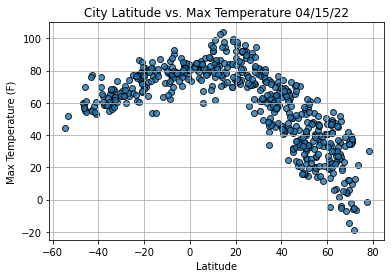

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

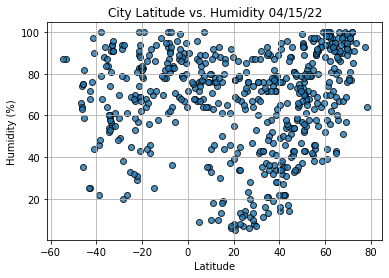

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

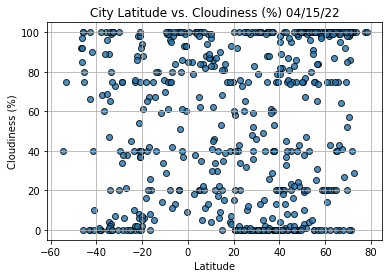

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

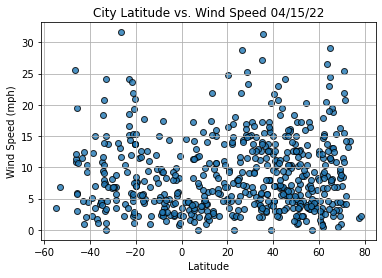

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Albany,US,2022-04-15 16:20:18,42.6001,-73.9662,63.28,22,1,3.00
2,Cherskiy,RU,2022-04-15 16:20:18,68.7500,161.3000,3.94,100,92,3.15
7,Tuktoyaktuk,CA,2022-04-15 16:18:17,69.4541,-133.0374,-14.80,76,20,2.30
11,Torbay,CA,2022-04-15 16:20:21,47.6666,-52.7314,42.89,58,40,10.36
12,Cayenne,GF,2022-04-15 16:20:22,4.9333,-52.3333,86.04,9,20,17.27


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
%matplotlib inline
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
plt.show()

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))